In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_18592\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[3023]

Unnamed: 0                         3023.000000
EPIC ID                       220222902.000000
Teff                               4047.781500
logg                                  4.824400
Flare #                               4.000000
Observation time                     78.682659
Average flare duration                0.132806
Longest flare duration                0.245180
Shortest flare duration               0.081726
Average percentage increase          40.488461
Highest percentage increase         131.633115
Lowest percentage increase            7.938659
Name: 3023, dtype: float64

In [4]:
flc = from_mast("220222902", mode="LC", mission="K2")

9% (342/3847) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
9% (342/3847) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

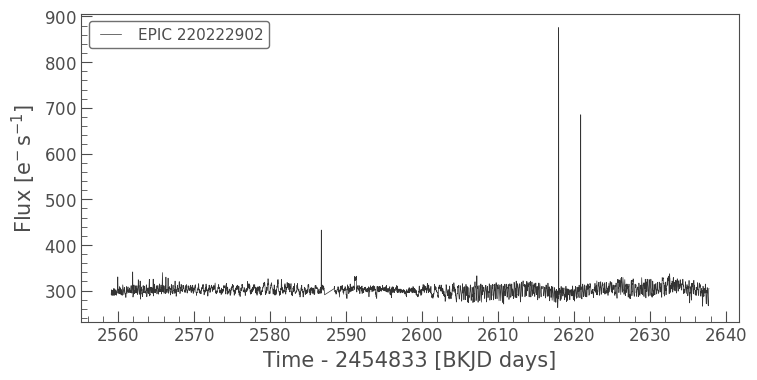

In [5]:
flc.plot()

In [6]:
flc = flc.detrend("savgol")

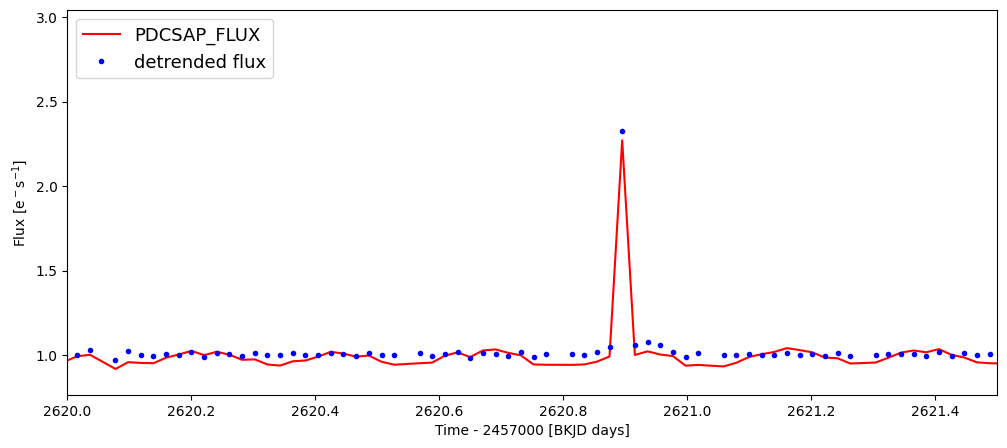

In [13]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
plt.xlim(2620, 2621.5)
#plt.ylim(.95,1.05)
plt.legend(loc=2,fontsize=13);

In [10]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,153,157,120083,120088,2562.664738,2562.766899,617.5251229903351,46.58690208711986,0.09888219833374023,0.102161,3493.000000
1,1407,1418,121477,121489,2591.146843,2591.392023,1382.5153130405115,65.14542419349895,0.07938659191131592,0.245180,3493.000000
2,2158,2162,122263,122267,2607.206071,2607.287797,486.3145614034543,32.87344268246652,0.1249384880065918,0.081726,3493.000000
3,2736,2741,122932,122937,2620.874772,2620.976930,2725.050091435155,22.520153612501634,1.316331148147583,0.102158,3493.000000


In [9]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 0 candidate(s) in the (0,69) gap.
Found 1 candidate(s) in the (69,1280) gap.
Found 2 candidate(s) in the (1280,2426) gap.
Found 0 candidate(s) in the (2426,2517) gap.
Found 0 candidate(s) in the (2517,2578) gap.
Found 1 candidate(s) in the (2578,3493) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
